<a href="https://colab.research.google.com/github/nikhil2020/California_Housing_price/blob/master/California_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**California_Housing_Price_Project**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
pwd

'/content'

In [13]:
import os
os.chdir("/content/drive/My Drive/Datasets/California_Housing")

In [14]:
df = pd.read_csv("housing.csv")

# Data Understanding and Exploration

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [16]:
df.shape

(20640, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Checking for null values in the data

In [19]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

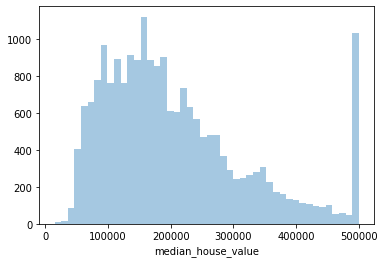

In [20]:
sns.distplot(df['median_house_value'],kde = False)

##### The house value is mostly lies between 100000 to 200000 can be stated from the distplot graph


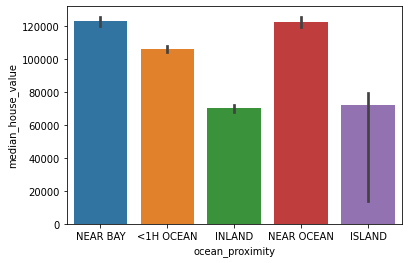

In [21]:
sns.barplot(x='ocean_proximity',y='median_house_value',data = df,estimator =np.std )

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [23]:
## IV and DV Formation
iv=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']]



In [24]:
dv=df[['median_house_value']]

In [25]:
iv.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [26]:
dv.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


In [29]:
!pip install scikit-learn

In [32]:
# Replacing the null values with mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
iv[['total_bedrooms' ]]=imputer.fit_transform(iv[['total_bedrooms']])



In [33]:
dummy=pd.get_dummies(iv['ocean_proximity'])
iv=pd.concat([iv,dummy],axis=1)



In [34]:
iv.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,0,0,0,1,0


In [35]:
iv.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [36]:
iv.drop(['ocean_proximity'],axis = 1,inplace = True)

In [37]:
iv.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [38]:
from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=0)



In [39]:
print(iv_train.shape)
print(iv_test.shape)
print(dv_train.shape)
print(dv_test.shape)

(16512, 13)
(4128, 13)
(16512, 1)
(4128, 1)


# **Linear Regression Model**

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(iv_train, dv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
iv_train.shape

(16512, 13)

In [42]:
dv_train.shape

(16512, 1)

In [43]:
y_pred = regressor.predict(iv_test)

In [44]:
# Prediction Values
y_pred = pd.DataFrame(y_pred)
y_pred.head()



,0
0,216580.434451
1,287452.107836
2,179457.580646
3,86485.418340
4,291756.937449


In [45]:
print("The R Square of the model is " ,regressor.score(iv_train,dv_train))
print("The Coefficient if Regression is/are" ,regressor.coef_)
print("The Intercept of the model is " ,regressor.intercept_)



The R Square of the model is  0.6471730344800684
The Coefficient if Regression is/are [[-2.68729910e+04 -2.55222624e+04  1.07274356e+03 -4.29097784e+00
   6.75765322e+01 -3.86809282e+01  7.80527480e+01  3.87557948e+04
  -2.48711513e+04 -6.34751288e+04  1.36842599e+05 -2.91870349e+04
  -1.93092843e+04]]
The Intercept of the model is  [-2249496.3718301]


The accuracy of the LInear regression model is 64%

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(dv_test,y_pred))

In [47]:
# Root squared mean error
rms

68689.20561705154

## **RandomForest Regression Model**

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(iv_train, dv_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [49]:
rf_pred = regressor.predict(iv_test)

In [50]:
dv_test.shape

(4128, 1)

In [51]:
# Prediction values for Random Forest Regression Model
rf_pred

array([146310., 219750., 142970., ..., 146300., 200930., 185510.])

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(dv_test, rf_pred))



In [53]:
# Root squared mean error for Random Forest
rms

51083.61202499402

# **Decision Tree Regression Model**

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(iv_train, dv_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [55]:
# Predicting the values of model on test data
dt_pred = regressor.predict(iv_test)



In [56]:
# Prediction value
dt_pred = pd.DataFrame(dt_pred)
dt_pred.head()




,0
0,139800.0
1,267600.0
2,160300.0
3,96300.0
4,500001.0


In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(dv_test,dt_pred))



In [58]:
# Root mean squared_error for Decision Tree
rms

68130.86709564866